In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("my_file (1).csv")

In [3]:
df.shape

(20, 11)

In [4]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [6]:
for column in df.columns:
    print(df[column].unique())
    print('-'* 20)

[ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20]
--------------------
['1' '1[4]' '2[7]' '2[4]' '2[10]' nan '1[20]' '2[c]']
--------------------
['2' '7[2]' '2[5]' '10[7]' nan '10[9]' '14[17]']
--------------------
['$780,000,000' '$579,800,000' '$411,000,000' '$397,300,000'
 '$345,675,146' '$305,158,363' '$280,000,000' '$257,600,000'
 '$256,084,556' '$250,400,000' '$229,100,000[b]' '$227,400,000'
 '$204,000,000' '$200,000,000' '$194,000,000' '$184,000,000'
 '$170,000,000' '$169,800,000' '$167,700,000[e]' '$150,000,000']
--------------------
['$780,000,000' '$579,800,000' '$560,622,615' '$454,751,555'
 '$402,844,849' '$388,978,496' '$381,932,682' '$257,600,000'
 '$312,258,401' '$309,141,878' '$283,202,896' '$295,301,479'
 '$251,856,802' '$299,676,265' '$281,617,035' '$227,452,347'
 '$213,568,571' '$207,046,755' '$204,486,106' '$185,423,109']
--------------------
['Taylor Swift' 'Beyoncé' 'Madonna' 'Pink' 'Celine Dion' 'Lady Gaga'
 'Katy Perry' 'Cher' 'Adele']
----------------

In [7]:
useless = "(\[[0-9]*[a-z]*\])"

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
C:\Users\amane chor\AppData\Local\Temp\ipykernel_4572\2073028403.py:1: SyntaxWarning: invalid escape sequence '\['
  useless = "(\[[0-9]*[a-z]*\])"


In [8]:
df["Tour title"] = df["Tour title"].apply(lambda x: re.sub(useless, "", str(x)))

In [9]:
for column in df.columns:
    df[column] = df[column].apply(lambda x: re.sub(useless,'',str(x)))

In [10]:
df['Actual\xa0gross'] = df['Actual\xa0gross'].apply(lambda x : x.replace('$','').replace(',',''))

In [11]:
df['Average gross'] = df['Average gross'].apply(lambda x : x.replace('$','').replace(',',''))

In [12]:
df['Adjusted\xa0gross (in 2022 dollars)'] = df['Adjusted\xa0gross (in 2022 dollars)'].apply(lambda x : x.replace('$','').replace(',',''))

In [13]:
df['Tour title'] = df['Tour title'].apply(lambda x : x.replace('‡','').replace('†',''))

In [14]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,
2,3,1,2,411000000,560622615,Madonna,Sticky & Sweet Tour,2008–2009,85,4835294,
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,
4,5,2,nan,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,


In [15]:
df['Start_Year']=df['Year(s)'].apply(lambda x : x[0:4])
df['End_Year']= df['Year(s)'].apply(lambda x : x[-4:])
df.drop('Year(s)',inplace=True, axis=1)
df.drop('Ref.', inplace=True, axis=1)

In [16]:
for column in df.columns:
    print(df[column].unique())
    print('-'* 20)

['1' '2' '3' '4' '5' '6' '7' '9' '10' '11' '12' '13' '14' '15' '16' '17'
 '18' '19' '20']
--------------------
['1' '2' 'nan']
--------------------
['2' '7' '10' 'nan' '14']
--------------------
['780000000' '579800000' '411000000' '397300000' '345675146' '305158363'
 '280000000' '257600000' '256084556' '250400000' '229100000' '227400000'
 '204000000' '200000000' '194000000' '184000000' '170000000' '169800000'
 '167700000' '150000000']
--------------------
['780000000' '579800000' '560622615' '454751555' '402844849' '388978496'
 '381932682' '257600000' '312258401' '309141878' '283202896' '295301479'
 '251856802' '299676265' '281617035' '227452347' '213568571' '207046755'
 '204486106' '185423109']
--------------------
['Taylor Swift' 'Beyoncé' 'Madonna' 'Pink' 'Celine Dion' 'Lady Gaga'
 'Katy Perry' 'Cher' 'Adele']
--------------------
['The Eras Tour ' 'Renaissance World Tour' 'Sticky & Sweet Tour '
 'Beautiful Trauma World Tour' 'Reputation Stadium Tour' 'The MDNA Tour'
 'Taking Chanc

<Axes: xlabel='All Time Peak', ylabel='Count'>

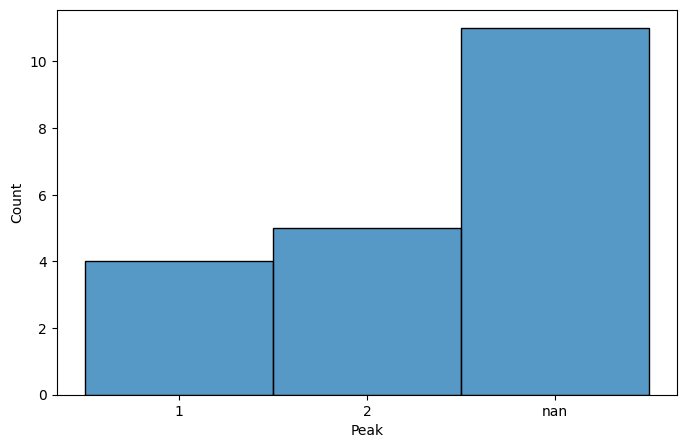

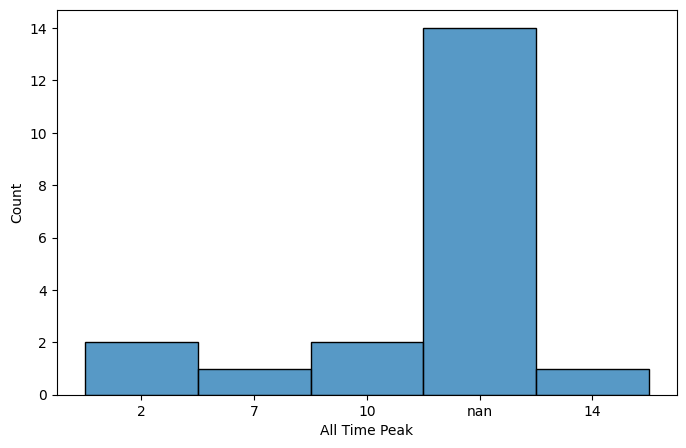

In [17]:
fig, ax = plt.subplots(figsize= (8,5))
sns.histplot(df['Peak'])
fig, ax = plt.subplots(figsize= (8,5))
sns.histplot(df['All Time Peak'])

In [18]:
df['Peak'] = df['Peak'].apply(lambda x : str(x).replace('nan','0').replace('Nan','0'))
df['All Time Peak'] = df['All Time Peak'].apply(lambda x : str(x).replace('nan','0').replace('Nan','0'))

In [19]:
df.describe(include='all')

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start_Year,End_Year
count,20,20,20,20,20,20,20,20,20,20,20
unique,19,3,5,20,20,9,20,18,20,11,14
top,7,0,0,780000000,780000000,Taylor Swift,The Eras Tour,56,13928571,2023,2014
freq,2,11,14,1,1,4,1,2,1,3,3


In [20]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start_Year,End_Year
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,56,13928571,2023,2024
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,56,10353571,2023,2023
2,3,1,2,411000000,560622615,Madonna,Sticky & Sweet Tour,85,4835294,2008,2009
3,4,2,10,397300000,454751555,Pink,Beautiful Trauma World Tour,156,2546795,2018,2019
4,5,2,0,345675146,402844849,Taylor Swift,Reputation Stadium Tour,53,6522173,2018,2018


In [21]:
df.to_csv('cleaned_data.csv')